In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier

# Charger le jeu de données
df = pd.read_csv('dataset_test4.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']



cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['UrbanRural'] + ['FranchiseBinary']
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, n_jobs=-1, max_depth=15, min_child_weight=16))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.05, random_state=42, stratify=y)

# Ajuster la pipeline sur les données d'entraînement
xgboost_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = xgboost_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)


Nombre de caractéristiques après le prétraitement : 121
0.9478379635011043
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     27435
           1       0.88      0.86      0.87      6977

    accuracy                           0.95     34412
   macro avg       0.92      0.91      0.92     34412
weighted avg       0.95      0.95      0.95     34412



In [3]:
cat_vars, num_vars

(['State',
  'BankState',
  'RevLineCr',
  'LowDoc',
  'UrbanRural',
  'FranchiseBinary'],
 ['Zip', 'NAICS', 'Term', 'NoEmp', 'FranchiseCode'])

In [4]:
new_data = pd.DataFrame({
    'State': ['NH', 'CA', 'NJ'],  
    'BankState': ['NH', 'CA', 'NJ'],  
    'RevLineCr': ['Y', 'N', 'N'],
    'LowDoc': ['Y', 'N', 'N'], 
    'UrbanRural': [0, 1, 0],
    'FranchiseBinary': [0, 1, 0],
    'Zip': [47711, 47711, 0],
    'NAICS': [451120, 451120, 0],
    'Term': [84, 240, 45],
    'NoEmp': [2, 5, 10],
    'FranchiseCode': [0, 1, 0],
})

# faire des prédictions avec le modèle optimisé
new_y_ped = xgboost_pipeline.predict(new_data)

# ajouter les prédictions à new_data
new_data['1->NO  0->YES'] = new_y_ped

print(new_data)

  State BankState RevLineCr LowDoc  UrbanRural  FranchiseBinary    Zip  \
0    NH        NH         Y      Y           0                0  47711   
1    CA        CA         N      N           1                1  47711   
2    NJ        NJ         N      N           0                0      0   

    NAICS  Term  NoEmp  FranchiseCode  1->NO  0->YES  
0  451120    84      2              0              0  
1  451120   240      5              1              0  
2       0    45     10              0              1  


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test1.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']


cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


rf_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy, report)


Nombre de caractéristiques après le prétraitement : 125


c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9352464673616913               precision    recall  f1-score   support

           0       0.94      0.98      0.96    109739
           1       0.90      0.77      0.83     27906

    accuracy                           0.94    137645
   macro avg       0.92      0.87      0.89    137645
weighted avg       0.93      0.94      0.93    137645



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Charger le jeu de données
df = pd.read_csv('dataset_test1.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']


cat_vars = X.select_dtypes(include=['object']).columns.tolist() + ['NewExist'] + ['UrbanRural'] + ['FranchiseBinary'] 
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('NewExist')  
num_vars.remove('UrbanRural') 
num_vars.remove('FranchiseBinary') 

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(max_depth=11, random_state=42))
])
#XGBClassifier(n_estimators = 100, random_state=42, n_jobs=-1,max_depth=15, min_child_weight=16)
# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.05, random_state=42, stratify=y)

# Ajuster la pipeline sur les données d'entraînement
xgboost_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = xgboost_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)


Learning rate set to 0.164109
0:	learn: 0.5095867	total: 109ms	remaining: 1m 48s
1:	learn: 0.4138191	total: 200ms	remaining: 1m 39s
2:	learn: 0.3467039	total: 290ms	remaining: 1m 36s
3:	learn: 0.3010808	total: 386ms	remaining: 1m 36s
4:	learn: 0.2789938	total: 471ms	remaining: 1m 33s
5:	learn: 0.2642452	total: 556ms	remaining: 1m 32s
6:	learn: 0.2437829	total: 653ms	remaining: 1m 32s
7:	learn: 0.2346555	total: 750ms	remaining: 1m 33s
8:	learn: 0.2277696	total: 829ms	remaining: 1m 31s
9:	learn: 0.2193533	total: 924ms	remaining: 1m 31s
10:	learn: 0.2121967	total: 1.01s	remaining: 1m 31s
11:	learn: 0.2087423	total: 1.1s	remaining: 1m 30s
12:	learn: 0.2053869	total: 1.19s	remaining: 1m 30s
13:	learn: 0.2021258	total: 1.27s	remaining: 1m 29s
14:	learn: 0.1985728	total: 1.37s	remaining: 1m 29s
15:	learn: 0.1964005	total: 1.46s	remaining: 1m 29s
16:	learn: 0.1943320	total: 1.56s	remaining: 1m 30s
17:	learn: 0.1913743	total: 1.65s	remaining: 1m 30s
18:	learn: 0.1893660	total: 1.75s	remaining: 

In [18]:
# Obtenir les importances des caractéristiques du modèle XGBoost
feature_importances = xgboost_pipeline.named_steps['classifier'].feature_importances_

# Obtenir les noms des caractéristiques transformées
feature_names = xgboost_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Créer un DataFrame pour visualiser les importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les importances des caractéristiques
print(importance_df)

               Feature  Importance
2            num__Term   37.021331
1           num__NAICS    6.457993
8        num__SBA_Appv    5.440639
0             num__Zip    4.849685
7          num__GrAppv    4.659452
..                 ...         ...
60   cat__BankState_AK    0.004743
101  cat__BankState_PR    0.000976
62   cat__BankState_AN    0.000000
109  cat__BankState_VI    0.000000
72   cat__BankState_GU    0.000000

[126 rows x 2 columns]


In [19]:
import pickle
with open('best_model.pkl', 'wb') as fichier:
    pickle.dump(xgboost_pipeline, fichier)

In [20]:
cat_vars, num_vars

(['State',
  'BankState',
  'RevLineCr',
  'LowDoc',
  'NewExist',
  'UrbanRural',
  'FranchiseBinary'],
 ['Zip',
  'NAICS',
  'Term',
  'NoEmp',
  'CreateJob',
  'RetainedJob',
  'FranchiseCode',
  'GrAppv',
  'SBA_Appv'])

In [21]:
new_data = pd.DataFrame({
    'State': ['NH', 'CA', 'NJ'],  
    'BankState': ['NH', 'CA', 'NJ'],  
    'RevLineCr': ['Y', 'N', 'N'],
    'LowDoc': ['Y', 'N', 'N'],
    'NewExist': [1,2,2],  
    'UrbanRural': [0, 1, 0],
    'FranchiseBinary': [0, 1, 0],
    'Zip': [47711, 47711, 0],
    'NAICS': [451120, 451120, 7083],
    'Term': [84, 240, 45],
    'NoEmp': [2, 5, 45],
    'CreateJob': [0,7, 0],
    'RetainedJob': [0, 1, 0],
    'FranchiseCode': [0, 1, 0],
    'GrAppv': [60000.0, 287000.0, 600000.0],
    'SBA_Appv': [32000.0, 215250.0, 499998.0],
})

# faire des prédictions avec le modèle optimisé
new_y_ped = xgboost_pipeline.predict(new_data)

# ajouter les prédictions à new_data
new_data['1->NO  0->YES'] = new_y_ped

print(new_data)

  State BankState RevLineCr LowDoc  NewExist  UrbanRural  FranchiseBinary  \
0    NH        NH         Y      Y         1           0                0   
1    CA        CA         N      N         2           1                1   
2    NJ        NJ         N      N         2           0                0   

     Zip   NAICS  Term  NoEmp  CreateJob  RetainedJob  FranchiseCode  \
0  47711  451120    84      2          0            0              0   
1  47711  451120   240      5          7            1              1   
2      0    7083    45     45          0            0              0   

     GrAppv  SBA_Appv  1->NO  0->YES  
0   60000.0   32000.0              0  
1  287000.0  215250.0              0  
2  600000.0  499998.0              0  


In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred_xgb = cross_val_predict(xgboost_pipeline, X_train, y_train)

Learning rate set to 0.149194
0:	learn: 0.5244457	total: 101ms	remaining: 1m 40s
1:	learn: 0.4307234	total: 186ms	remaining: 1m 32s
2:	learn: 0.3633447	total: 297ms	remaining: 1m 38s
3:	learn: 0.3183538	total: 384ms	remaining: 1m 35s
4:	learn: 0.2945713	total: 456ms	remaining: 1m 30s
5:	learn: 0.2757053	total: 536ms	remaining: 1m 28s
6:	learn: 0.2605177	total: 622ms	remaining: 1m 28s
7:	learn: 0.2496680	total: 705ms	remaining: 1m 27s
8:	learn: 0.2363139	total: 788ms	remaining: 1m 26s
9:	learn: 0.2266825	total: 884ms	remaining: 1m 27s
10:	learn: 0.2184294	total: 981ms	remaining: 1m 28s
11:	learn: 0.2117652	total: 1.07s	remaining: 1m 28s
12:	learn: 0.2078592	total: 1.16s	remaining: 1m 28s
13:	learn: 0.2045712	total: 1.25s	remaining: 1m 27s
14:	learn: 0.2004353	total: 1.34s	remaining: 1m 27s
15:	learn: 0.1988452	total: 1.43s	remaining: 1m 28s
16:	learn: 0.1963653	total: 1.51s	remaining: 1m 27s
17:	learn: 0.1938739	total: 1.59s	remaining: 1m 26s
18:	learn: 0.1916982	total: 1.68s	remaining:

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.149194
0:	learn: 0.5426269	total: 84.5ms	remaining: 1m 24s
1:	learn: 0.4312931	total: 172ms	remaining: 1m 25s
2:	learn: 0.3695028	total: 260ms	remaining: 1m 26s
3:	learn: 0.3238955	total: 357ms	remaining: 1m 28s
4:	learn: 0.2923753	total: 455ms	remaining: 1m 30s
5:	learn: 0.2697150	total: 549ms	remaining: 1m 30s
6:	learn: 0.2576847	total: 631ms	remaining: 1m 29s
7:	learn: 0.2468457	total: 721ms	remaining: 1m 29s
8:	learn: 0.2387006	total: 807ms	remaining: 1m 28s
9:	learn: 0.2277270	total: 890ms	remaining: 1m 28s
10:	learn: 0.2209810	total: 973ms	remaining: 1m 27s
11:	learn: 0.2159389	total: 1.07s	remaining: 1m 27s
12:	learn: 0.2122474	total: 1.16s	remaining: 1m 27s
13:	learn: 0.2086960	total: 1.24s	remaining: 1m 27s
14:	learn: 0.2056169	total: 1.33s	remaining: 1m 27s
15:	learn: 0.2013340	total: 1.42s	remaining: 1m 27s
16:	learn: 0.1993134	total: 1.51s	remaining: 1m 27s
17:	learn: 0.1970945	total: 1.59s	remaining: 1m 26s
18:	learn: 0.1934373	total: 1.67s	remaining

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.149194
0:	learn: 0.5235586	total: 80.8ms	remaining: 1m 20s
1:	learn: 0.4300713	total: 155ms	remaining: 1m 17s
2:	learn: 0.3622771	total: 233ms	remaining: 1m 17s
3:	learn: 0.3153237	total: 309ms	remaining: 1m 17s
4:	learn: 0.2914017	total: 385ms	remaining: 1m 16s
5:	learn: 0.2729381	total: 463ms	remaining: 1m 16s
6:	learn: 0.2590249	total: 534ms	remaining: 1m 15s
7:	learn: 0.2484972	total: 622ms	remaining: 1m 17s
8:	learn: 0.2383224	total: 707ms	remaining: 1m 17s
9:	learn: 0.2277465	total: 789ms	remaining: 1m 18s
10:	learn: 0.2212963	total: 862ms	remaining: 1m 17s
11:	learn: 0.2160593	total: 927ms	remaining: 1m 16s
12:	learn: 0.2099671	total: 1s	remaining: 1m 16s
13:	learn: 0.2070075	total: 1.09s	remaining: 1m 17s
14:	learn: 0.2038285	total: 1.18s	remaining: 1m 17s
15:	learn: 0.2013475	total: 1.25s	remaining: 1m 17s
16:	learn: 0.1980351	total: 1.33s	remaining: 1m 17s
17:	learn: 0.1958327	total: 1.41s	remaining: 1m 16s
18:	learn: 0.1913513	total: 1.49s	remaining: 1

array([[507137,  14119],
       [ 17044, 115509]], dtype=int64)

Predicted PIF (0)  Predicted CHGOFF (1)
Actual PIF (0)                507137                 14119
Actual CHGOFF (1)              17044                115509

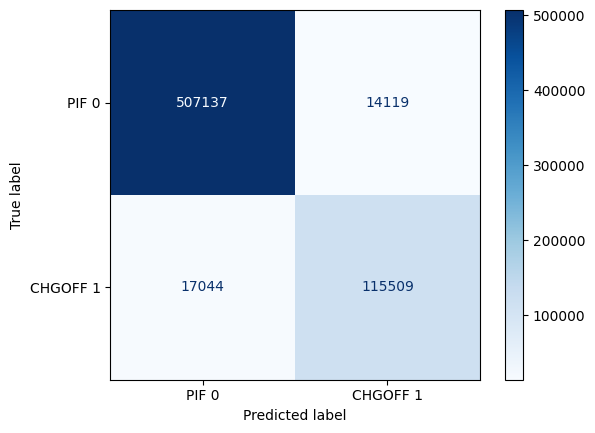

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# On crée la matrice de confusion en passant les classes et les prédictions du modèle, puis on l'affiche
cm = confusion_matrix(y_train, y_train_pred_xgb)
display(cm)

# Affichage avec un DataFrame
conf_matrix = pd.DataFrame(cm, index=["Actual PIF (0)", "Actual CHGOFF (1)"], columns=["Predicted PIF (0)", "Predicted CHGOFF (1)"])
display(conf_matrix)

# Affichage avec un plot
graph_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["PIF 0", "CHGOFF 1"])
graph_cm.plot(cmap="Blues")

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    521256
           1       0.89      0.87      0.88    132553

    accuracy                           0.95    653809
   macro avg       0.93      0.92      0.93    653809
weighted avg       0.95      0.95      0.95    653809



In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
# Au lieu d'obtenir les prédictions, on récupere les scores de probabilités pour chaque observations
y_probas_xgb = cross_val_predict(xgboost_pipeline, X_train, y_train, method="predict_proba")
display(y_probas_xgb)

# On récupere uniquement les probabilités pour la classe positive
y_scores_xgb = y_probas_xgb[:, 1]

# A partir des probabilités on calcule les combinaisons de scores pour recall et precision en fonction du seuil
precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_train, y_scores_xgb)

Learning rate set to 0.149194
0:	learn: 0.5244457	total: 82.4ms	remaining: 1m 22s
1:	learn: 0.4307234	total: 157ms	remaining: 1m 18s
2:	learn: 0.3633447	total: 247ms	remaining: 1m 22s
3:	learn: 0.3183538	total: 327ms	remaining: 1m 21s
4:	learn: 0.2945713	total: 399ms	remaining: 1m 19s
5:	learn: 0.2757053	total: 475ms	remaining: 1m 18s
6:	learn: 0.2605177	total: 574ms	remaining: 1m 21s
7:	learn: 0.2496680	total: 643ms	remaining: 1m 19s
8:	learn: 0.2363139	total: 718ms	remaining: 1m 19s
9:	learn: 0.2266825	total: 795ms	remaining: 1m 18s
10:	learn: 0.2184294	total: 872ms	remaining: 1m 18s
11:	learn: 0.2117652	total: 952ms	remaining: 1m 18s
12:	learn: 0.2078592	total: 1.03s	remaining: 1m 18s
13:	learn: 0.2045712	total: 1.1s	remaining: 1m 17s
14:	learn: 0.2004353	total: 1.19s	remaining: 1m 18s
15:	learn: 0.1988452	total: 1.28s	remaining: 1m 18s
16:	learn: 0.1963653	total: 1.35s	remaining: 1m 18s
17:	learn: 0.1938739	total: 1.43s	remaining: 1m 18s
18:	learn: 0.1916982	total: 1.5s	remaining: 

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.149194
0:	learn: 0.5426269	total: 73ms	remaining: 1m 12s
1:	learn: 0.4312931	total: 152ms	remaining: 1m 15s
2:	learn: 0.3695028	total: 226ms	remaining: 1m 15s
3:	learn: 0.3238955	total: 311ms	remaining: 1m 17s
4:	learn: 0.2923753	total: 390ms	remaining: 1m 17s
5:	learn: 0.2697150	total: 470ms	remaining: 1m 17s
6:	learn: 0.2576847	total: 539ms	remaining: 1m 16s
7:	learn: 0.2468457	total: 618ms	remaining: 1m 16s
8:	learn: 0.2387006	total: 694ms	remaining: 1m 16s
9:	learn: 0.2277270	total: 768ms	remaining: 1m 16s
10:	learn: 0.2209810	total: 839ms	remaining: 1m 15s
11:	learn: 0.2159389	total: 915ms	remaining: 1m 15s
12:	learn: 0.2122474	total: 990ms	remaining: 1m 15s
13:	learn: 0.2086960	total: 1.06s	remaining: 1m 14s
14:	learn: 0.2056169	total: 1.14s	remaining: 1m 14s
15:	learn: 0.2013340	total: 1.22s	remaining: 1m 15s
16:	learn: 0.1993134	total: 1.31s	remaining: 1m 15s
17:	learn: 0.1970945	total: 1.4s	remaining: 1m 16s
18:	learn: 0.1934373	total: 1.49s	remaining: 1

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.149194
0:	learn: 0.5235586	total: 79.8ms	remaining: 1m 19s
1:	learn: 0.4300713	total: 153ms	remaining: 1m 16s
2:	learn: 0.3622771	total: 233ms	remaining: 1m 17s
3:	learn: 0.3153237	total: 309ms	remaining: 1m 16s
4:	learn: 0.2914017	total: 386ms	remaining: 1m 16s
5:	learn: 0.2729381	total: 466ms	remaining: 1m 17s
6:	learn: 0.2590249	total: 542ms	remaining: 1m 16s
7:	learn: 0.2484972	total: 626ms	remaining: 1m 17s
8:	learn: 0.2383224	total: 714ms	remaining: 1m 18s
9:	learn: 0.2277465	total: 797ms	remaining: 1m 18s
10:	learn: 0.2212963	total: 871ms	remaining: 1m 18s
11:	learn: 0.2160593	total: 936ms	remaining: 1m 17s
12:	learn: 0.2099671	total: 1.01s	remaining: 1m 16s
13:	learn: 0.2070075	total: 1.08s	remaining: 1m 16s
14:	learn: 0.2038285	total: 1.16s	remaining: 1m 16s
15:	learn: 0.2013475	total: 1.23s	remaining: 1m 15s
16:	learn: 0.1980351	total: 1.31s	remaining: 1m 15s
17:	learn: 0.1958327	total: 1.39s	remaining: 1m 15s
18:	learn: 0.1913513	total: 1.47s	remaining

array([[0.56515606, 0.43484394],
       [0.00478463, 0.99521537],
       [0.99146559, 0.00853441],
       ...,
       [0.99183429, 0.00816571],
       [0.99849133, 0.00150867],
       [0.99532405, 0.00467595]])

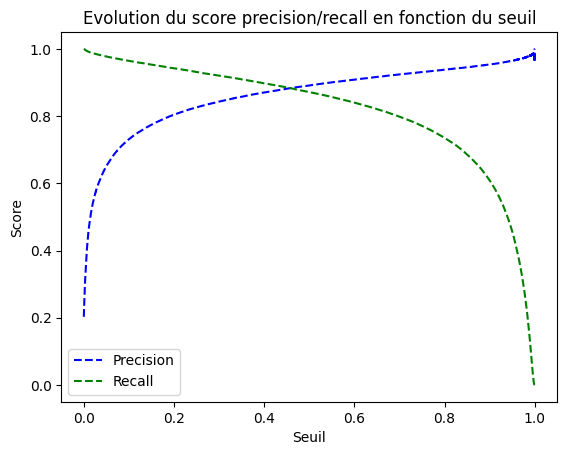

In [26]:
import matplotlib.pyplot as plt

plt.plot(thresholds_xgb, precisions_xgb[:-1], "b--", label="Precision")
plt.plot(thresholds_xgb, recalls_xgb[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import roc_curve

# La fonction roc_curve retourne le FPR, TPR et les seuils 
fpr_xgb, tpr_xgb, tresholds_xgb = roc_curve(y_train, y_scores_xgb)

In [28]:
# Fonction pour représenter la courbe ROC
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("Courbe ROC")
    plt.xlabel("Taux de Faux Positif")
    plt.ylabel("Taux de Vrai Positif")
    plt.grid()

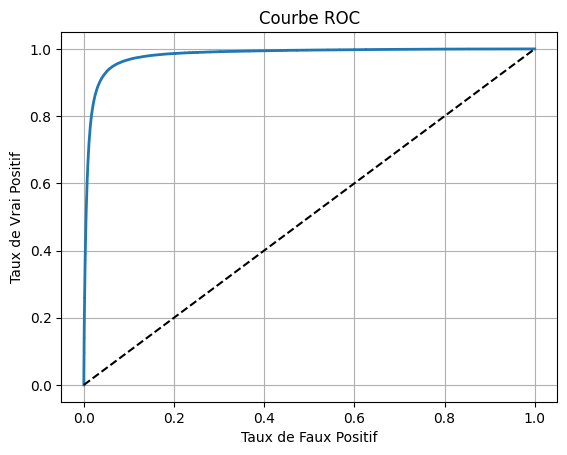

In [29]:
plot_roc_curve(fpr_xgb, tpr_xgb)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score

display(roc_auc_score(y_train, y_scores_xgb))

0.9819835186990404

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


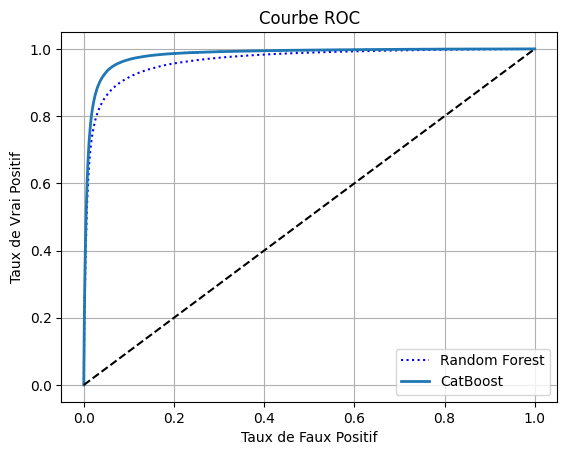

AUC modèle XGBOOST 0.9819835186990404
AUC modèle Random Forest 0.9653238134830905


In [31]:
# On récupere les scores pour le modèle random forest
y_probas_rf = cross_val_predict(rf_pipeline, X_train, y_train, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]

# On calcule le TPR et FPR pour le modèle random forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)

# On représente graphiquement les deux modèles
plt.plot(fpr_rf, tpr_rf, "b:", label="Random Forest")
plot_roc_curve(fpr_xgb, tpr_xgb, "CatBoost")
plt.legend(loc="lower right")
plt.show()

print("AUC modèle XGBOOST", roc_auc_score(y_train, y_scores_xgb))
print("AUC modèle Random Forest", roc_auc_score(y_train, y_scores_rf))

Learning rate set to 0.055815
0:	learn: 0.6331993	total: 18.1ms	remaining: 18.1s
1:	learn: 0.5741494	total: 74.1ms	remaining: 37s
2:	learn: 0.5305546	total: 127ms	remaining: 42.1s
3:	learn: 0.4936633	total: 175ms	remaining: 43.5s
4:	learn: 0.4591500	total: 223ms	remaining: 44.3s
5:	learn: 0.4295731	total: 263ms	remaining: 43.5s
6:	learn: 0.4051534	total: 301ms	remaining: 42.7s
7:	learn: 0.3816925	total: 340ms	remaining: 42.2s
8:	learn: 0.3646174	total: 378ms	remaining: 41.6s
9:	learn: 0.3459363	total: 421ms	remaining: 41.7s
10:	learn: 0.3327782	total: 460ms	remaining: 41.3s
11:	learn: 0.3201455	total: 500ms	remaining: 41.2s
12:	learn: 0.3102192	total: 540ms	remaining: 41s
13:	learn: 0.3010774	total: 583ms	remaining: 41.1s
14:	learn: 0.2924359	total: 626ms	remaining: 41.1s
15:	learn: 0.2867936	total: 667ms	remaining: 41.1s
16:	learn: 0.2810748	total: 712ms	remaining: 41.2s
17:	learn: 0.2746321	total: 754ms	remaining: 41.1s
18:	learn: 0.2692810	total: 793ms	remaining: 40.9s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.07504
0:	learn: 0.6012373	total: 53.8ms	remaining: 53.8s
1:	learn: 0.5366212	total: 105ms	remaining: 52.5s
2:	learn: 0.4787497	total: 159ms	remaining: 52.8s
3:	learn: 0.4388239	total: 212ms	remaining: 52.9s
4:	learn: 0.4030922	total: 266ms	remaining: 52.9s
5:	learn: 0.3762973	total: 320ms	remaining: 53s
6:	learn: 0.3550454	total: 363ms	remaining: 51.5s
7:	learn: 0.3365310	total: 404ms	remaining: 50.1s
8:	learn: 0.3191609	total: 447ms	remaining: 49.2s
9:	learn: 0.3055951	total: 489ms	remaining: 48.4s
10:	learn: 0.2956494	total: 534ms	remaining: 48s
11:	learn: 0.2811903	total: 579ms	remaining: 47.7s
12:	learn: 0.2733935	total: 624ms	remaining: 47.4s
13:	learn: 0.2636634	total: 670ms	remaining: 47.2s
14:	learn: 0.2572648	total: 715ms	remaining: 47s
15:	learn: 0.2512631	total: 760ms	remaining: 46.7s
16:	learn: 0.2466079	total: 804ms	remaining: 46.5s
17:	learn: 0.2418246	total: 847ms	remaining: 46.2s
18:	learn: 0.2376186	total: 892ms	remaining: 46.1s
19:	learn: 0.2344

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.07504
0:	learn: 0.6023987	total: 63.6ms	remaining: 1m 3s
1:	learn: 0.5382141	total: 123ms	remaining: 1m 1s
2:	learn: 0.4854398	total: 184ms	remaining: 1m 1s
3:	learn: 0.4473398	total: 218ms	remaining: 54.4s
4:	learn: 0.4105843	total: 284ms	remaining: 56.6s
5:	learn: 0.3799750	total: 351ms	remaining: 58.1s
6:	learn: 0.3579057	total: 409ms	remaining: 58s
7:	learn: 0.3381637	total: 463ms	remaining: 57.4s
8:	learn: 0.3214622	total: 519ms	remaining: 57.2s
9:	learn: 0.3103730	total: 564ms	remaining: 55.9s
10:	learn: 0.2968643	total: 608ms	remaining: 54.6s
11:	learn: 0.2828094	total: 650ms	remaining: 53.5s
12:	learn: 0.2740903	total: 693ms	remaining: 52.6s
13:	learn: 0.2653135	total: 734ms	remaining: 51.7s
14:	learn: 0.2590069	total: 775ms	remaining: 50.9s
15:	learn: 0.2533791	total: 815ms	remaining: 50.1s
16:	learn: 0.2480535	total: 856ms	remaining: 49.5s
17:	learn: 0.2442018	total: 904ms	remaining: 49.3s
18:	learn: 0.2399091	total: 953ms	remaining: 49.2s
19:	learn: 0.

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.089224
0:	learn: 0.5842636	total: 51.1ms	remaining: 51s
1:	learn: 0.5119617	total: 96.3ms	remaining: 48.1s
2:	learn: 0.4560682	total: 161ms	remaining: 53.6s
3:	learn: 0.4133153	total: 219ms	remaining: 54.6s
4:	learn: 0.3761309	total: 270ms	remaining: 53.7s
5:	learn: 0.3463569	total: 322ms	remaining: 53.3s
6:	learn: 0.3259976	total: 368ms	remaining: 52.2s
7:	learn: 0.3095369	total: 414ms	remaining: 51.4s
8:	learn: 0.2898355	total: 460ms	remaining: 50.7s
9:	learn: 0.2770200	total: 505ms	remaining: 50s
10:	learn: 0.2695176	total: 550ms	remaining: 49.5s
11:	learn: 0.2586409	total: 596ms	remaining: 49.1s
12:	learn: 0.2526190	total: 641ms	remaining: 48.7s
13:	learn: 0.2442330	total: 686ms	remaining: 48.3s
14:	learn: 0.2401875	total: 731ms	remaining: 48s
15:	learn: 0.2356637	total: 787ms	remaining: 48.4s
16:	learn: 0.2320090	total: 843ms	remaining: 48.8s
17:	learn: 0.2263904	total: 906ms	remaining: 49.4s
18:	learn: 0.2238510	total: 961ms	remaining: 49.6s
19:	learn: 0.22

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.100886
0:	learn: 0.5860464	total: 73.5ms	remaining: 1m 13s
1:	learn: 0.5019936	total: 152ms	remaining: 1m 16s
2:	learn: 0.4427197	total: 210ms	remaining: 1m 9s
3:	learn: 0.3909551	total: 270ms	remaining: 1m 7s
4:	learn: 0.3582257	total: 323ms	remaining: 1m 4s
5:	learn: 0.3279288	total: 382ms	remaining: 1m 3s
6:	learn: 0.3091851	total: 437ms	remaining: 1m 1s
7:	learn: 0.2917663	total: 495ms	remaining: 1m 1s
8:	learn: 0.2787828	total: 552ms	remaining: 1m
9:	learn: 0.2677262	total: 609ms	remaining: 1m
10:	learn: 0.2596162	total: 662ms	remaining: 59.5s
11:	learn: 0.2539550	total: 716ms	remaining: 58.9s
12:	learn: 0.2422920	total: 767ms	remaining: 58.2s
13:	learn: 0.2341954	total: 824ms	remaining: 58s
14:	learn: 0.2295278	total: 884ms	remaining: 58.1s
15:	learn: 0.2244095	total: 946ms	remaining: 58.1s
16:	learn: 0.2196371	total: 998ms	remaining: 57.7s
17:	learn: 0.2162714	total: 1.05s	remaining: 57.2s
18:	learn: 0.2139327	total: 1.1s	remaining: 56.8s
19:	learn: 0.2116

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.110971
0:	learn: 0.5689580	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.4833404	total: 136ms	remaining: 1m 7s
2:	learn: 0.4163375	total: 191ms	remaining: 1m 3s
3:	learn: 0.3731661	total: 244ms	remaining: 1m
4:	learn: 0.3411898	total: 300ms	remaining: 59.8s
5:	learn: 0.3178327	total: 354ms	remaining: 58.7s
6:	learn: 0.2977173	total: 409ms	remaining: 58s
7:	learn: 0.2822346	total: 466ms	remaining: 57.7s
8:	learn: 0.2711070	total: 520ms	remaining: 57.2s
9:	learn: 0.2579461	total: 578ms	remaining: 57.2s
10:	learn: 0.2462517	total: 638ms	remaining: 57.3s
11:	learn: 0.2379997	total: 700ms	remaining: 57.6s
12:	learn: 0.2328106	total: 756ms	remaining: 57.4s
13:	learn: 0.2288487	total: 813ms	remaining: 57.3s
14:	learn: 0.2252670	total: 874ms	remaining: 57.4s
15:	learn: 0.2213232	total: 938ms	remaining: 57.7s
16:	learn: 0.2166203	total: 999ms	remaining: 57.8s
17:	learn: 0.2125197	total: 1.07s	remaining: 58.2s
18:	learn: 0.2105254	total: 1.13s	remaining: 58.5s
19:	learn: 0.20

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.119956
0:	learn: 0.5525367	total: 63.1ms	remaining: 1m 3s
1:	learn: 0.4654273	total: 121ms	remaining: 1m
2:	learn: 0.3994183	total: 180ms	remaining: 60s
3:	learn: 0.3555872	total: 238ms	remaining: 59.2s
4:	learn: 0.3261926	total: 295ms	remaining: 58.8s
5:	learn: 0.3035438	total: 354ms	remaining: 58.7s
6:	learn: 0.2858252	total: 409ms	remaining: 58s
7:	learn: 0.2724220	total: 465ms	remaining: 57.7s
8:	learn: 0.2553976	total: 527ms	remaining: 58.1s
9:	learn: 0.2466801	total: 587ms	remaining: 58.1s
10:	learn: 0.2407578	total: 639ms	remaining: 57.4s
11:	learn: 0.2343957	total: 700ms	remaining: 57.6s
12:	learn: 0.2259150	total: 760ms	remaining: 57.7s
13:	learn: 0.2217868	total: 819ms	remaining: 57.7s
14:	learn: 0.2166128	total: 880ms	remaining: 57.8s
15:	learn: 0.2119439	total: 945ms	remaining: 58.1s
16:	learn: 0.2092549	total: 1.01s	remaining: 58.2s
17:	learn: 0.2067207	total: 1.07s	remaining: 58.2s
18:	learn: 0.2048490	total: 1.12s	remaining: 58s
19:	learn: 0.202569

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.128117
0:	learn: 0.5614546	total: 59ms	remaining: 59s
1:	learn: 0.4594079	total: 124ms	remaining: 1m 1s
2:	learn: 0.3905761	total: 187ms	remaining: 1m 2s
3:	learn: 0.3430684	total: 248ms	remaining: 1m 1s
4:	learn: 0.3087181	total: 317ms	remaining: 1m 3s
5:	learn: 0.2910670	total: 378ms	remaining: 1m 2s
6:	learn: 0.2746968	total: 446ms	remaining: 1m 3s
7:	learn: 0.2612170	total: 508ms	remaining: 1m 2s
8:	learn: 0.2486692	total: 564ms	remaining: 1m 2s
9:	learn: 0.2407998	total: 627ms	remaining: 1m 2s
10:	learn: 0.2347445	total: 689ms	remaining: 1m 1s
11:	learn: 0.2263118	total: 756ms	remaining: 1m 2s
12:	learn: 0.2212613	total: 813ms	remaining: 1m 1s
13:	learn: 0.2157883	total: 879ms	remaining: 1m 1s
14:	learn: 0.2112073	total: 941ms	remaining: 1m 1s
15:	learn: 0.2081183	total: 997ms	remaining: 1m 1s
16:	learn: 0.2049338	total: 1.06s	remaining: 1m 1s
17:	learn: 0.2016109	total: 1.13s	remaining: 1m 1s
18:	learn: 0.1997807	total: 1.19s	remaining: 1m 1s
19:	learn: 0.1

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.135634
0:	learn: 0.5548352	total: 64.3ms	remaining: 1m 4s
1:	learn: 0.4500620	total: 135ms	remaining: 1m 7s
2:	learn: 0.3873150	total: 200ms	remaining: 1m 6s
3:	learn: 0.3319973	total: 266ms	remaining: 1m 6s
4:	learn: 0.3019318	total: 334ms	remaining: 1m 6s
5:	learn: 0.2828120	total: 393ms	remaining: 1m 5s
6:	learn: 0.2685561	total: 460ms	remaining: 1m 5s
7:	learn: 0.2555136	total: 531ms	remaining: 1m 5s
8:	learn: 0.2468341	total: 598ms	remaining: 1m 5s
9:	learn: 0.2399615	total: 662ms	remaining: 1m 5s
10:	learn: 0.2297056	total: 732ms	remaining: 1m 5s
11:	learn: 0.2248928	total: 804ms	remaining: 1m 6s
12:	learn: 0.2197708	total: 869ms	remaining: 1m 5s
13:	learn: 0.2164840	total: 939ms	remaining: 1m 6s
14:	learn: 0.2132492	total: 1.01s	remaining: 1m 6s
15:	learn: 0.2091034	total: 1.07s	remaining: 1m 6s
16:	learn: 0.2049172	total: 1.14s	remaining: 1m 5s
17:	learn: 0.2010263	total: 1.2s	remaining: 1m 5s
18:	learn: 0.1991492	total: 1.25s	remaining: 1m 4s
19:	learn: 

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.14263
0:	learn: 0.5485755	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.4289029	total: 138ms	remaining: 1m 9s
2:	learn: 0.3642646	total: 211ms	remaining: 1m 10s
3:	learn: 0.3215731	total: 281ms	remaining: 1m 10s
4:	learn: 0.2986199	total: 347ms	remaining: 1m 8s
5:	learn: 0.2768476	total: 419ms	remaining: 1m 9s
6:	learn: 0.2583421	total: 490ms	remaining: 1m 9s
7:	learn: 0.2484987	total: 553ms	remaining: 1m 8s
8:	learn: 0.2388938	total: 625ms	remaining: 1m 8s
9:	learn: 0.2330820	total: 698ms	remaining: 1m 9s
10:	learn: 0.2237529	total: 778ms	remaining: 1m 9s
11:	learn: 0.2190686	total: 853ms	remaining: 1m 10s
12:	learn: 0.2153414	total: 924ms	remaining: 1m 10s
13:	learn: 0.2117003	total: 992ms	remaining: 1m 9s
14:	learn: 0.2064157	total: 1.06s	remaining: 1m 9s
15:	learn: 0.2035806	total: 1.14s	remaining: 1m 9s
16:	learn: 0.2001661	total: 1.21s	remaining: 1m 9s
17:	learn: 0.1978316	total: 1.28s	remaining: 1m 9s
18:	learn: 0.1960584	total: 1.35s	remaining: 1m 9s
19:	lea

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.149194
0:	learn: 0.5237404	total: 79.7ms	remaining: 1m 19s
1:	learn: 0.4303506	total: 152ms	remaining: 1m 15s
2:	learn: 0.3632140	total: 230ms	remaining: 1m 16s
3:	learn: 0.3184725	total: 303ms	remaining: 1m 15s
4:	learn: 0.2847903	total: 371ms	remaining: 1m 13s
5:	learn: 0.2678107	total: 444ms	remaining: 1m 13s
6:	learn: 0.2551389	total: 516ms	remaining: 1m 13s
7:	learn: 0.2436680	total: 593ms	remaining: 1m 13s
8:	learn: 0.2364058	total: 667ms	remaining: 1m 13s
9:	learn: 0.2282970	total: 747ms	remaining: 1m 13s
10:	learn: 0.2226621	total: 823ms	remaining: 1m 13s
11:	learn: 0.2181595	total: 899ms	remaining: 1m 14s
12:	learn: 0.2116856	total: 974ms	remaining: 1m 13s
13:	learn: 0.2087739	total: 1.04s	remaining: 1m 13s
14:	learn: 0.2047052	total: 1.12s	remaining: 1m 13s
15:	learn: 0.2020025	total: 1.19s	remaining: 1m 13s
16:	learn: 0.1990406	total: 1.27s	remaining: 1m 13s
17:	learn: 0.1970141	total: 1.34s	remaining: 1m 13s
18:	learn: 0.1945977	total: 1.42s	remaining

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.055815
0:	learn: 0.6367500	total: 51ms	remaining: 50.9s
1:	learn: 0.5832475	total: 100ms	remaining: 49.9s
2:	learn: 0.5348149	total: 145ms	remaining: 48.2s
3:	learn: 0.4976026	total: 188ms	remaining: 46.9s
4:	learn: 0.4623640	total: 229ms	remaining: 45.5s
5:	learn: 0.4319708	total: 270ms	remaining: 44.8s
6:	learn: 0.4094958	total: 310ms	remaining: 43.9s
7:	learn: 0.3877658	total: 349ms	remaining: 43.3s
8:	learn: 0.3673159	total: 388ms	remaining: 42.7s
9:	learn: 0.3502027	total: 425ms	remaining: 42.1s
10:	learn: 0.3381414	total: 462ms	remaining: 41.5s
11:	learn: 0.3264578	total: 501ms	remaining: 41.2s
12:	learn: 0.3150808	total: 541ms	remaining: 41.1s
13:	learn: 0.3064545	total: 582ms	remaining: 41s
14:	learn: 0.2995802	total: 622ms	remaining: 40.9s
15:	learn: 0.2931364	total: 663ms	remaining: 40.8s
16:	learn: 0.2841374	total: 706ms	remaining: 40.8s
17:	learn: 0.2781725	total: 747ms	remaining: 40.7s
18:	learn: 0.2726317	total: 785ms	remaining: 40.6s
19:	learn: 0.2

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.07504
0:	learn: 0.6023987	total: 55.9ms	remaining: 55.8s
1:	learn: 0.5382141	total: 109ms	remaining: 54.3s
2:	learn: 0.4854398	total: 156ms	remaining: 51.8s
3:	learn: 0.4473398	total: 179ms	remaining: 44.5s
4:	learn: 0.4105843	total: 222ms	remaining: 44.2s
5:	learn: 0.3799750	total: 265ms	remaining: 43.8s
6:	learn: 0.3579057	total: 303ms	remaining: 43s
7:	learn: 0.3381637	total: 342ms	remaining: 42.5s
8:	learn: 0.3214622	total: 383ms	remaining: 42.2s
9:	learn: 0.3103730	total: 423ms	remaining: 41.9s
10:	learn: 0.2968643	total: 465ms	remaining: 41.8s
11:	learn: 0.2828094	total: 507ms	remaining: 41.8s
12:	learn: 0.2740903	total: 551ms	remaining: 41.9s
13:	learn: 0.2653135	total: 597ms	remaining: 42s
14:	learn: 0.2590069	total: 640ms	remaining: 42s
15:	learn: 0.2533791	total: 684ms	remaining: 42s
16:	learn: 0.2480535	total: 727ms	remaining: 42.1s
17:	learn: 0.2442018	total: 770ms	remaining: 42s
18:	learn: 0.2399091	total: 815ms	remaining: 42.1s
19:	learn: 0.2339484	

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.089224
0:	learn: 0.5842636	total: 49.5ms	remaining: 49.4s
1:	learn: 0.5119617	total: 95.3ms	remaining: 47.5s
2:	learn: 0.4560682	total: 141ms	remaining: 46.8s
3:	learn: 0.4133153	total: 187ms	remaining: 46.6s
4:	learn: 0.3761309	total: 243ms	remaining: 48.3s
5:	learn: 0.3463569	total: 295ms	remaining: 48.8s
6:	learn: 0.3259976	total: 339ms	remaining: 48.1s
7:	learn: 0.3095369	total: 384ms	remaining: 47.6s
8:	learn: 0.2898355	total: 431ms	remaining: 47.4s
9:	learn: 0.2770200	total: 477ms	remaining: 47.2s
10:	learn: 0.2695176	total: 521ms	remaining: 46.9s
11:	learn: 0.2586409	total: 567ms	remaining: 46.7s
12:	learn: 0.2526190	total: 614ms	remaining: 46.6s
13:	learn: 0.2442330	total: 662ms	remaining: 46.6s
14:	learn: 0.2401875	total: 710ms	remaining: 46.6s
15:	learn: 0.2356637	total: 762ms	remaining: 46.9s
16:	learn: 0.2320090	total: 808ms	remaining: 46.7s
17:	learn: 0.2263904	total: 859ms	remaining: 46.8s
18:	learn: 0.2238510	total: 910ms	remaining: 47s
19:	learn: 

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.100886
0:	learn: 0.5860464	total: 52.6ms	remaining: 52.5s
1:	learn: 0.5019936	total: 111ms	remaining: 55.4s
2:	learn: 0.4427197	total: 166ms	remaining: 55s
3:	learn: 0.3909551	total: 222ms	remaining: 55.4s
4:	learn: 0.3582257	total: 274ms	remaining: 54.6s
5:	learn: 0.3279288	total: 329ms	remaining: 54.5s
6:	learn: 0.3091851	total: 379ms	remaining: 53.7s
7:	learn: 0.2917663	total: 428ms	remaining: 53.1s
8:	learn: 0.2787828	total: 477ms	remaining: 52.5s
9:	learn: 0.2677262	total: 527ms	remaining: 52.2s
10:	learn: 0.2596162	total: 573ms	remaining: 51.5s
11:	learn: 0.2539550	total: 622ms	remaining: 51.2s
12:	learn: 0.2422920	total: 672ms	remaining: 51s
13:	learn: 0.2341954	total: 721ms	remaining: 50.8s
14:	learn: 0.2295278	total: 771ms	remaining: 50.6s
15:	learn: 0.2244095	total: 822ms	remaining: 50.5s
16:	learn: 0.2196371	total: 870ms	remaining: 50.3s
17:	learn: 0.2162714	total: 918ms	remaining: 50.1s
18:	learn: 0.2139327	total: 967ms	remaining: 49.9s
19:	learn: 0.2

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.110971
0:	learn: 0.5690030	total: 57.1ms	remaining: 57s
1:	learn: 0.4834299	total: 111ms	remaining: 55.2s
2:	learn: 0.4164396	total: 167ms	remaining: 55.6s
3:	learn: 0.3732572	total: 224ms	remaining: 55.8s
4:	learn: 0.3412775	total: 285ms	remaining: 56.8s
5:	learn: 0.3179181	total: 342ms	remaining: 56.7s
6:	learn: 0.2977999	total: 398ms	remaining: 56.4s
7:	learn: 0.2792133	total: 447ms	remaining: 55.4s
8:	learn: 0.2629404	total: 500ms	remaining: 55s
9:	learn: 0.2534632	total: 545ms	remaining: 54s
10:	learn: 0.2465308	total: 593ms	remaining: 53.3s
11:	learn: 0.2376662	total: 647ms	remaining: 53.2s
12:	learn: 0.2321723	total: 698ms	remaining: 53s
13:	learn: 0.2282527	total: 753ms	remaining: 53s
14:	learn: 0.2238105	total: 808ms	remaining: 53s
15:	learn: 0.2192390	total: 863ms	remaining: 53.1s
16:	learn: 0.2161160	total: 913ms	remaining: 52.8s
17:	learn: 0.2130211	total: 967ms	remaining: 52.8s
18:	learn: 0.2095232	total: 1.02s	remaining: 52.5s
19:	learn: 0.2077560	t

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.119956
0:	learn: 0.5521221	total: 61.8ms	remaining: 1m 1s
1:	learn: 0.4620836	total: 123ms	remaining: 1m 1s
2:	learn: 0.3960550	total: 190ms	remaining: 1m 3s
3:	learn: 0.3491556	total: 284ms	remaining: 1m 10s
4:	learn: 0.3213002	total: 338ms	remaining: 1m 7s
5:	learn: 0.2967733	total: 400ms	remaining: 1m 6s
6:	learn: 0.2828070	total: 464ms	remaining: 1m 5s
7:	learn: 0.2702547	total: 533ms	remaining: 1m 6s
8:	learn: 0.2594878	total: 591ms	remaining: 1m 5s
9:	learn: 0.2466452	total: 658ms	remaining: 1m 5s
10:	learn: 0.2392753	total: 713ms	remaining: 1m 4s
11:	learn: 0.2326870	total: 775ms	remaining: 1m 3s
12:	learn: 0.2289006	total: 828ms	remaining: 1m 2s
13:	learn: 0.2225960	total: 888ms	remaining: 1m 2s
14:	learn: 0.2168050	total: 952ms	remaining: 1m 2s
15:	learn: 0.2135081	total: 1.01s	remaining: 1m 2s
16:	learn: 0.2092655	total: 1.07s	remaining: 1m 1s
17:	learn: 0.2066986	total: 1.13s	remaining: 1m 1s
18:	learn: 0.2042494	total: 1.19s	remaining: 1m 1s
19:	learn

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.128117
0:	learn: 0.5461996	total: 66.5ms	remaining: 1m 6s
1:	learn: 0.4566969	total: 128ms	remaining: 1m 3s
2:	learn: 0.3880854	total: 192ms	remaining: 1m 3s
3:	learn: 0.3463620	total: 251ms	remaining: 1m 2s
4:	learn: 0.3097931	total: 313ms	remaining: 1m 2s
5:	learn: 0.2900036	total: 376ms	remaining: 1m 2s
6:	learn: 0.2740562	total: 436ms	remaining: 1m 1s
7:	learn: 0.2613199	total: 501ms	remaining: 1m 2s
8:	learn: 0.2535305	total: 563ms	remaining: 1m 2s
9:	learn: 0.2397105	total: 628ms	remaining: 1m 2s
10:	learn: 0.2300018	total: 695ms	remaining: 1m 2s
11:	learn: 0.2235874	total: 757ms	remaining: 1m 2s
12:	learn: 0.2194137	total: 816ms	remaining: 1m 1s
13:	learn: 0.2158223	total: 878ms	remaining: 1m 1s
14:	learn: 0.2129769	total: 939ms	remaining: 1m 1s
15:	learn: 0.2092858	total: 999ms	remaining: 1m 1s
16:	learn: 0.2067266	total: 1.05s	remaining: 1m
17:	learn: 0.2028452	total: 1.12s	remaining: 1m
18:	learn: 0.2000304	total: 1.18s	remaining: 1m
19:	learn: 0.197794

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.135634
0:	learn: 0.5415838	total: 70ms	remaining: 1m 9s
1:	learn: 0.4442346	total: 139ms	remaining: 1m 9s
2:	learn: 0.3812293	total: 206ms	remaining: 1m 8s
3:	learn: 0.3305517	total: 272ms	remaining: 1m 7s
4:	learn: 0.2988266	total: 338ms	remaining: 1m 7s
5:	learn: 0.2802823	total: 402ms	remaining: 1m 6s
6:	learn: 0.2671354	total: 469ms	remaining: 1m 6s
7:	learn: 0.2528789	total: 540ms	remaining: 1m 6s
8:	learn: 0.2428774	total: 605ms	remaining: 1m 6s
9:	learn: 0.2355979	total: 669ms	remaining: 1m 6s
10:	learn: 0.2259141	total: 740ms	remaining: 1m 6s
11:	learn: 0.2213675	total: 807ms	remaining: 1m 6s
12:	learn: 0.2169088	total: 873ms	remaining: 1m 6s
13:	learn: 0.2120875	total: 941ms	remaining: 1m 6s
14:	learn: 0.2087065	total: 999ms	remaining: 1m 5s
15:	learn: 0.2054169	total: 1.06s	remaining: 1m 5s
16:	learn: 0.2030083	total: 1.13s	remaining: 1m 5s
17:	learn: 0.2006932	total: 1.19s	remaining: 1m 5s
18:	learn: 0.1970114	total: 1.25s	remaining: 1m 4s
19:	learn: 0

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.14263
0:	learn: 0.5326477	total: 81.8ms	remaining: 1m 21s
1:	learn: 0.4381751	total: 158ms	remaining: 1m 18s
2:	learn: 0.3705838	total: 240ms	remaining: 1m 19s
3:	learn: 0.3233385	total: 317ms	remaining: 1m 19s
4:	learn: 0.2971778	total: 383ms	remaining: 1m 16s
5:	learn: 0.2713979	total: 462ms	remaining: 1m 16s
6:	learn: 0.2585428	total: 539ms	remaining: 1m 16s
7:	learn: 0.2473370	total: 616ms	remaining: 1m 16s
8:	learn: 0.2392325	total: 702ms	remaining: 1m 17s
9:	learn: 0.2315140	total: 785ms	remaining: 1m 17s
10:	learn: 0.2239968	total: 871ms	remaining: 1m 18s
11:	learn: 0.2186949	total: 942ms	remaining: 1m 17s
12:	learn: 0.2123467	total: 1.02s	remaining: 1m 17s
13:	learn: 0.2072867	total: 1.1s	remaining: 1m 17s
14:	learn: 0.2043449	total: 1.2s	remaining: 1m 18s
15:	learn: 0.2016296	total: 1.27s	remaining: 1m 18s
16:	learn: 0.1977650	total: 1.35s	remaining: 1m 18s
17:	learn: 0.1958348	total: 1.42s	remaining: 1m 17s
18:	learn: 0.1929146	total: 1.5s	remaining: 1m

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.149194
0:	learn: 0.5426269	total: 79.1ms	remaining: 1m 19s
1:	learn: 0.4312931	total: 165ms	remaining: 1m 22s
2:	learn: 0.3695028	total: 247ms	remaining: 1m 22s
3:	learn: 0.3238955	total: 330ms	remaining: 1m 22s
4:	learn: 0.2923753	total: 416ms	remaining: 1m 22s
5:	learn: 0.2697150	total: 499ms	remaining: 1m 22s
6:	learn: 0.2576847	total: 576ms	remaining: 1m 21s
7:	learn: 0.2468457	total: 663ms	remaining: 1m 22s
8:	learn: 0.2387006	total: 747ms	remaining: 1m 22s
9:	learn: 0.2277270	total: 833ms	remaining: 1m 22s
10:	learn: 0.2209810	total: 920ms	remaining: 1m 22s
11:	learn: 0.2159389	total: 1.01s	remaining: 1m 23s
12:	learn: 0.2122474	total: 1.1s	remaining: 1m 23s
13:	learn: 0.2086960	total: 1.18s	remaining: 1m 23s
14:	learn: 0.2056169	total: 1.27s	remaining: 1m 23s
15:	learn: 0.2013340	total: 1.35s	remaining: 1m 23s
16:	learn: 0.1993134	total: 1.44s	remaining: 1m 23s
17:	learn: 0.1970945	total: 1.51s	remaining: 1m 22s
18:	learn: 0.1934373	total: 1.59s	remaining:

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Learning rate set to 0.055815
0:	learn: 0.6367500	total: 52.2ms	remaining: 52.1s
1:	learn: 0.5832475	total: 100ms	remaining: 49.9s
2:	learn: 0.5348149	total: 146ms	remaining: 48.4s
3:	learn: 0.4976026	total: 187ms	remaining: 46.5s
4:	learn: 0.4623640	total: 231ms	remaining: 45.9s
5:	learn: 0.4319708	total: 272ms	remaining: 45s
6:	learn: 0.4094958	total: 313ms	remaining: 44.3s
7:	learn: 0.3877658	total: 354ms	remaining: 43.8s
8:	learn: 0.3673159	total: 394ms	remaining: 43.4s
9:	learn: 0.3502027	total: 437ms	remaining: 43.2s
10:	learn: 0.3381414	total: 478ms	remaining: 43s
11:	learn: 0.3264578	total: 519ms	remaining: 42.7s
12:	learn: 0.3150808	total: 560ms	remaining: 42.5s
13:	learn: 0.3064545	total: 601ms	remaining: 42.3s
14:	learn: 0.2995802	total: 644ms	remaining: 42.3s
15:	learn: 0.2931364	total: 686ms	remaining: 42.2s
16:	learn: 0.2841374	total: 728ms	remaining: 42.1s
17:	learn: 0.2781725	total: 770ms	remaining: 42s
18:	learn: 0.2726317	total: 811ms	remaining: 41.9s
19:	learn: 0.267

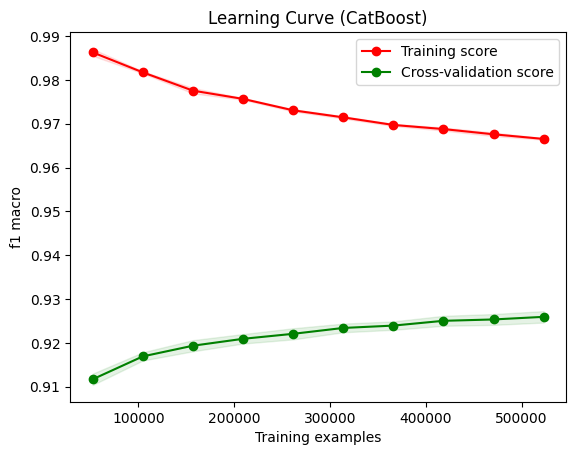

In [32]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = xgboost_pipeline,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'f1_macro'
)

#recuperation des moyennes et des écarts types(facultatif) à chaque cv
train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)


plt.figure()
plt.title("Learning Curve (CatBoost)")
plt.xlabel("Training examples")
plt.ylabel("f1 macro")
#plt.gca().invert_yaxis() #inverser y car métrique de perte

# afficher les points
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# relier les points
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")


plt.legend()
plt.show()